<a href="https://colab.research.google.com/github/wangyu16/PolymerScienceEducation/blob/master/OVESET/01_Molecular_Weight_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a href="https://wangyu16.github.io/PolymerScienceEducation/"><img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/master/Fig/Logo_black.svg" width='150' /></a></center>

# Molecular Weight Distribution

-----------

To learn the background knowledge, please visit this [study guide](https://hackmd.io/@YW2025/H1x5mWdiA).

##  What does this simulator do and how to use it?

This simulator provides statistical results of step-growth polymerization of AB type monomers and living chain-growth polymerization. Users can choose the polymerization type, the number of monomers in a range of 1000 to 10000, and the number of resulting polymers in a range of 5 to 100. Note: the simulation only deals with a small number of molecules, i.e. $< 10000$, while the real-world polymerization involves $10^{20}$ molecules. Thus, the distribution of the simulation results are quite different from the real-world polymerization results. Since the purpose of this simulator is to guide students to do average molecular weight calculations, a relatively small number of molecules is appropriate. The students will learn statistics of step-growth polymerization and chain-growth polymerization in more detail in future modules.

To run the simulator, simply choose the reaction conditions and run all the code cells.

The result shows two ways to calculate the average molecular weight:

1. Use the number fraction and weight fraction of resulting polymers with different chain lengths.
2. Through the moments of the molecular weight distribution.

The program guides you to calculate the number and weight average molecular weights step-by-step.

In [ ]:
#@title 1. Install and import packages {display-mode: "form" }
%%capture
import sys
if not 'sigfig' in sys.modules:
    !pip install sigfig
from sigfig import round
from IPython.display import Markdown
import random
import numpy as np
import pandas as pd
import csv
import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from collections import Counter
from re import M
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML, display

In [ ]:
#@title 2. Simulation conditions { display-mode: "form" }

Type_of_polymerization = "Step growth polymerization" #@param ["Step growth polymerization", "Living chain growth polymerization"]
Number_of_monomers = 8000 #@param{type:"slider", min:1000,max:10000,step:1}
Number_of_polymers = 60 #@param{type:"slider", min:5, max:100, step:1}
Monomer_molar_mass = 71 #@param{type:"slider", min:50, max: 300, step:1}



In [ ]:
#@title 3. Simulation { display-mode: "form" }

if Type_of_polymerization == "Step growth polymerization":
  polymers = [1]*Number_of_monomers
  while len(polymers) > Number_of_polymers:
    M_idx = random.sample(range(len(polymers)),2)
    M_idx.sort()
    polymers[M_idx[0]]+=polymers[M_idx[1]]
    polymers.pop(M_idx[1])
  polymers.sort()
else:
  polymers = [0]*Number_of_polymers
  for i in range(Number_of_monomers):
    M_idx = random.randint(0,len(polymers)-1)
    polymers[M_idx]+=1
  polymers.sort()

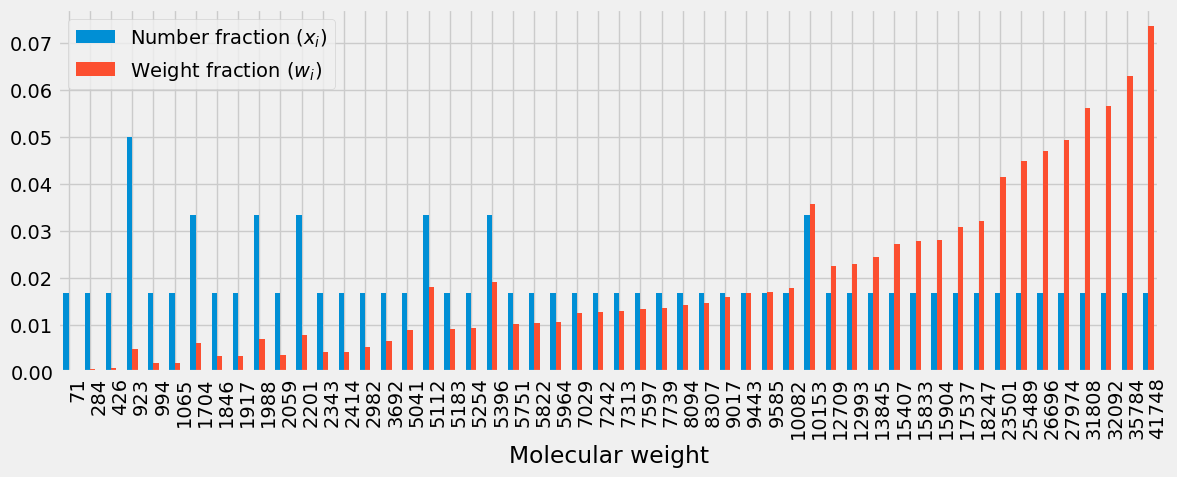

In [ ]:
#@title Plot the fractions of each type of polymers. { display-mode: "form" }
counter = Counter(polymers)
DP = np.array(list(counter.keys()))
MW = DP*Monomer_molar_mass
Num = np.array(list(counter.values()))

results = pd.DataFrame.from_dict({"DP": DP, "Molecular weight": MW, "Number": Num})
results.set_index("DP", inplace=True)
results["f_N"]=Num/Number_of_polymers
results["MW*f_N"] = MW*results["f_N"]
results["f_W"]=DP*Num/Number_of_monomers
results["MW*f_W"] = MW*results["f_W"]

Mn_1 = sum(results["MW*f_N"])
Mw_1 = sum(results["MW*f_W"])

M0 = sum(results["f_N"])
M1 = sum(results["Molecular weight"]*results["f_N"])
M2 = sum(results["Molecular weight"]**2*results["f_N"])
M3 = sum(results["Molecular weight"]**3*results["f_N"])
M4 = sum(results["Molecular weight"]**4*results["f_N"])

Mn_2 = M1
Mw_2 = M2/M1

if Number_of_polymers <= 30:
  figWidth=6
else:
  figWidth=Number_of_polymers*20/100
results[["Molecular weight","f_N","f_W"]].plot(kind='bar', x="Molecular weight", figsize=(figWidth,5))

plt.xlabel("Molecular weight")
plt.xticks(rotation=90, ha='left')
plt.legend(['Number fraction ($x_i$)','Weight fraction ($w_i$)'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#@title 4. Calculation  { display-mode: "form" }
#@markdown ### Calculation by number and weight fractions
#@markdown Show the number of each type of polymers. \
#@markdown Try to calculate by yourself before moving on.
results[['Molecular weight','Number']]

,Molecular weight,Number
DP,,
1,71,1
4,284,1
6,426,1
13,923,3
14,994,1
15,1065,1
24,1704,2
26,1846,1
27,1917,1


In [ ]:
#@title {display-mode: "form" }
#@markdown The results of the simulation as shown in the table above can be downloaded as csv files. In the left panel, click on the fourth icon "Files", you can see them listed there.

# Get the current timestamp
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")

# Create the file name with timestamp
file_name = f"polymer_simulation_results_{timestamp}.csv"

# Save the results to a CSV file with the timestamped file name
results[['Molecular weight','Number']].to_csv(file_name, index=True)

# Create a dictionary to store the parameters
params = {
    "Type_of_polymerization": Type_of_polymerization,
    "Number_of_monomers": Number_of_monomers,
    "Number_of_polymers": Number_of_polymers,
    "Monomer_molar_mass": Monomer_molar_mass
}

# Open the CSV file in append mode and add parameters as a new line
with open(file_name, 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(params.keys())  # Write parameter names as headers
    writer.writerow(params.values())  # Write parameter values

In [ ]:

#@title {display-mode: "form" }
#@markdown Show number fraction and weight fraction of each type of polymers.

# 1. Define LaTeX column titles
latex_column_names = {
       'DP': '$DP$',
       'Molecular weight': '$M_i$',
       'Number': '$n_i$',
       'f_N': '$x_i$',
       'MW*f_N': '$M_i \cdot x_i$',
       'f_W': '$w_i$',
       'MW*f_W': '$M_i \cdot w_i$'
   }

# 2. Reset index to make 'DP' a regular column
results = results.reset_index()

# 3. Rename columns (including DP)
results = results.rename(columns=latex_column_names)

# 4. Apply styles
styles = [
    dict(selector="th", props=[("text-align", "left")]),
    dict(selector="th, td", props=[("width", "150px")])  # Adjust width as needed
]

# 5. Convert to HTML and inject MathJax script
html_table = results.style.set_table_styles(styles).to_html()

# Add MathJax script
html_table = f"""
<script type="text/x-mathjax-config">
MathJax.Hub.Config({{
    tex2jax: {{inlineMath: [['$','$'], ['\\(','\\)']]}}
}});
</script>
<script type="text/javascript" async
    src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
</script>
{html_table}
"""

# 6. Display the HTML with JavaScript
display(HTML(html_table))



,$DP$,$M_i$,$n_i$,$x_i$,$M_i \cdot x_i$,$w_i$,$M_i \cdot w_i$
0,1,71,1,0.016667,1.183333,0.000125,0.008875
1,4,284,1,0.016667,4.733333,0.000500,0.142000
2,6,426,1,0.016667,7.100000,0.000750,0.319500
3,13,923,3,0.050000,46.150000,0.004875,4.499625
4,14,994,1,0.016667,16.566667,0.001750,1.739500
5,15,1065,1,0.016667,17.750000,0.001875,1.996875
6,24,1704,2,0.033333,56.800000,0.006000,10.224000
7,26,1846,1,0.016667,30.766667,0.003250,5.999500
8,27,1917,1,0.016667,31.950000,0.003375,6.469875
9,28,1988,2,0.033333,66.266667,0.007000,13.916000


In [ ]:
# @title {display-mode: "form" }

Markdown(f"The number average molecular weight ($M_n$) is {round(Mn_1, sigfigs=4)}, weight average ($M_w$) is {round(Mw_1, sigfigs=4)}, the molecular weight distribution can be represented by the value of $M_w/M_n$, which is {round(Mw_1/Mn_1,sigfigs=3)}.")

The number average molecular weight ($M_n$) is 9467.0, weight average ($M_w$) is 19380.0, the molecular weight distribution can be represented by the value of $M_w/M_n$, which is 2.05.

In [ ]:
#@title Calculation by moments { display-mode: "form" }
#@markdown The $n$-th moment simply equals:
#@markdown $$Mn=\sum_i M_i^n\times x_i$$

Markdown(f"The number average molecular weight ($M_n$) equals the first moment ($M1$) which is {round(Mn_1, sigfigs=4)}. The second moment ($M2$) is {round(M2, sigfigs=4)}. The weight average ($M_w$) equals $M2/M1$ which is {round(Mw_1, sigfigs=4)}.")

The number average molecular weight ($M_n$) equals the first moment ($M1$) which is 9467.0. The second moment ($M2$) is 183500000.0. The weight average ($M_w$) equals $M2/M1$ which is 19380.0.


---



In [ ]:
#@title Copyright { display-mode: "form" }
import requests
from IPython.display import Markdown
copyright = requests.get("https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/master/copyright.md")

Markdown(copyright.text)


### MIT License  

Copyright (c) 2021 -- 2024 Yu Wang

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### Contact

Dr. Yu Wang  
Department of Chemistry  
Institute for Materials Research and Innovation  
University of Louisiana at Lafayette  
Lafayette, LA 70504  
Email: yuwang@louisiana.edu

### Acknowledgement

This project is sponsored by National Science Foundation (NSF-2142043). 


In [ ]:
# @title {display-mode: "form" }
links = requests.get("https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/refs/heads/master/links.md")
Markdown(links.text)


### Links

| **[Home page of OVESET](https://wangyu16.github.io/PolymerScienceEducation/):** | **[Home page of Study Guide](https://hackmd.io/@YW2025/HJLiqoHRR)** |
|---|---|
| <img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/refs/heads/master/img/QR_OVESET.svg" alt="OVESET Home Page" width="300"> | <img src="https://raw.githubusercontent.com/wangyu16/PolymerScienceEducation/refs/heads/master/img/QR_PolymerStudyGuide.svg" alt="Introduction to Polymer Science" width="300"> |